In [106]:
import pickle
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


def warn(*args, **kwargs):
    pass


warnings.warn = warn
warnings.filterwarnings('ignore')

In [75]:
def two_d_compare(X_test, y_test, y_pred, model_name):
    plt.subplots(ncols=2, figsize=(10, 4))
    plt.suptitle('Actual vs Predicted data : ' + model_name + '. Variance score: %.2f' % r2_score(y_test, y_pred))

    plt.subplot(121)
    plt.scatter(X_test, y_test, alpha=0.8, color='#8CCB9B')
    plt.title('Actual')

    plt.subplot(122)
    plt.scatter(X_test, y_pred, alpha=0.8, color='#E5E88B')
    plt.title('Predicted')

    plt.show()


def model_metrics(regressor, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    print("Root mean squared error: %.2f" % math.sqrt(mse))
    r2 = r2_score(y_test, y_pred)
    print('R2 score: %.2f' % r2)
    return [mse, r2]


def two_vs_three(x_test, y_test, y_pred, z=None, isLinear=False):
    area = 60

    fig = plt.figure(figsize=(6, 6))
    fig.suptitle('view of sales price data')

    # First subplot
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(x_test, y_test, alpha=0.5, color='blue', s=area)
    ax.scatter(x_test, y_pred, alpha=0.5, color='red', s=area)
    #     ax.plot(x_test, y_pred, alpha=0.9,color='red', linewidth=2)
    ax.set_xlabel('LivingArea')
    ax.set_ylabel('Price')

    plt.title('LivingArea vs Price')

    plt.show()

In [76]:
df_pd = pd.read_csv("data/cleaned_data.csv")
df_pd.head()

,BathroomCount,BedroomCount,ConstructionYear,District,Fireplace,FloodingZone,Furnished,Garden,GardenArea,Kitchen,...,RoomCount,ShowerCount,StateOfBuilding,SubtypeOfProperty,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty,TypeOfSale
0,1.0,1,1969.0,Brugge,0.0,False,0.0,0.0,0.0,False,...,1.0,0.0,GOOD,flat_studio,0.0,0.0,1.0,1.0,2,residential_sale
1,0.0,2,1972.0,Hasselt,0.0,NON_FLOOD_ZONE,0.0,0.0,0.0,False,...,1.0,0.0,AS_NEW,apartment,0.0,0.0,1.0,1.0,2,residential_sale
2,1.0,0,1974.0,Namur,0.0,NON_FLOOD_ZONE,0.0,0.0,0.0,SEMI_EQUIPPED,...,0.0,1.0,GOOD,flat_studio,0.0,0.0,1.0,1.0,2,residential_sale
3,1.0,0,1974.0,Namur,0.0,NON_FLOOD_ZONE,0.0,0.0,0.0,NOT_INSTALLED,...,0.0,0.0,GOOD,flat_studio,0.0,0.0,1.0,0.0,2,residential_sale
4,2.0,0,1950.0,Brussels,0.0,NON_FLOOD_ZONE,0.0,1.0,100.0,SEMI_EQUIPPED,...,0.0,0.0,GOOD,apartment_block,178.0,0.0,0.0,3.0,1,residential_sale


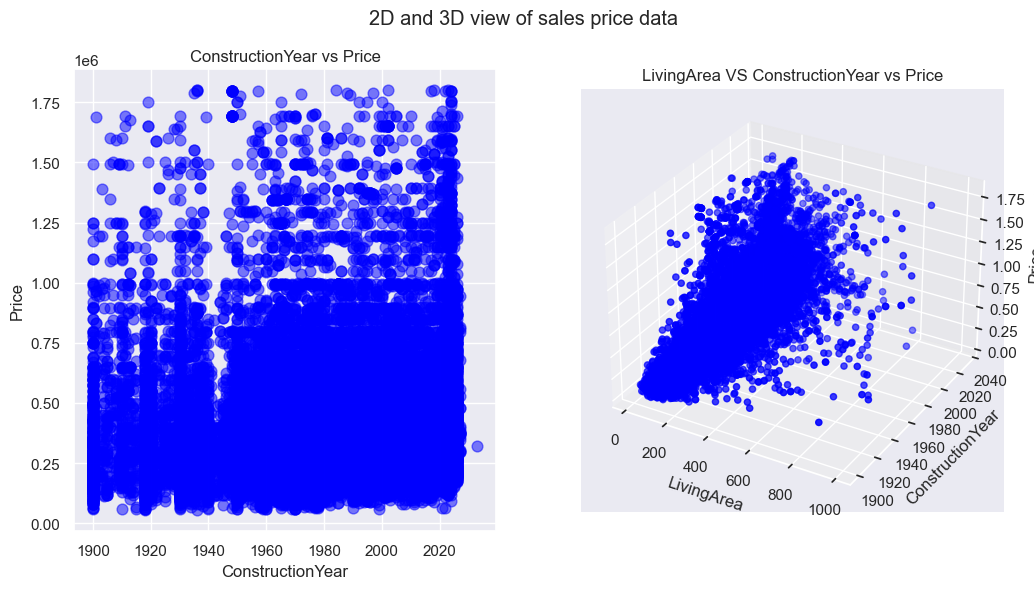

In [77]:
area = 60
x = df_pd['ConstructionYear']
y = df_pd['Price']
z = df_pd['LivingArea']

fig = plt.figure(figsize=(12, 6))
fig.suptitle('2D and 3D view of sales price data')

# First subplot
ax = fig.add_subplot(1, 2, 1)

ax.scatter(x, y, alpha=0.5, color='blue', s=area)
ax.set_xlabel('ConstructionYear')
ax.set_ylabel('Price')

plt.title('ConstructionYear vs Price')

# Second subplot
ax = fig.add_subplot(1, 2, 2, projection='3d')

ax.scatter(z, x, y, color='blue', marker='o')

ax.set_ylabel('ConstructionYear')
ax.set_zlabel('Price')
ax.set_xlabel('LivingArea')

plt.title('LivingArea VS ConstructionYear vs Price')

plt.show()

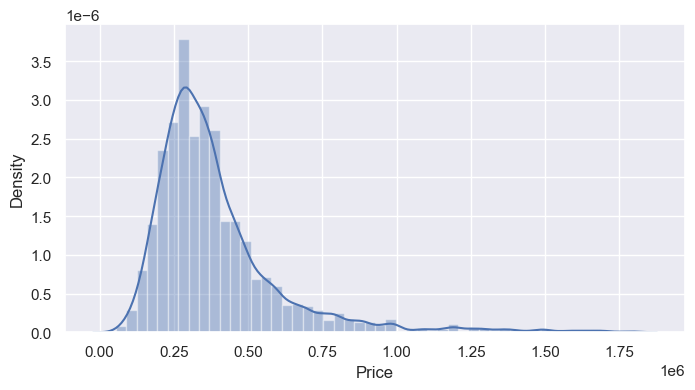

In [78]:
sns.set(rc={"figure.figsize": (8, 4)})
np.random.seed(0)
ax = sns.distplot(df_pd['Price'])
plt.show()

In [79]:
print("The dataset contains columns of the following data types : \n" + str(df_pd.dtypes))

The dataset contains columns of the following data types : 
BathroomCount        float64
BedroomCount           int64
ConstructionYear     float64
District              object
Fireplace            float64
FloodingZone          object
Furnished            float64
Garden               float64
GardenArea           float64
Kitchen               object
LivingArea           float64
Locality              object
NumberOfFacades      float64
PEB                   object
PostalCode             int64
Price                  int64
Province              object
Region                object
RoomCount            float64
ShowerCount          float64
StateOfBuilding       object
SubtypeOfProperty     object
SurfaceOfPlot        float64
SwimmingPool         float64
Terrace              float64
ToiletCount          float64
TypeOfProperty         int64
TypeOfSale            object
dtype: object


In [80]:
print("The dataset contains following number of records for each of the columns : \n" + str(df_pd.count()))

The dataset contains following number of records for each of the columns : 
BathroomCount        48575
BedroomCount         48575
ConstructionYear     48575
District             48575
Fireplace            48575
FloodingZone         48575
Furnished            48575
Garden               48575
GardenArea           48575
Kitchen              48575
LivingArea           48575
Locality             48575
NumberOfFacades      48575
PEB                  48575
PostalCode           48575
Price                48575
Province             48575
Region               48575
RoomCount            48575
ShowerCount          48575
StateOfBuilding      48575
SubtypeOfProperty    48575
SurfaceOfPlot        48575
SwimmingPool         48575
Terrace              48575
ToiletCount          48575
TypeOfProperty       48575
TypeOfSale           48575
dtype: int64


In [81]:
df_pd.isnull().any()

BathroomCount        False
BedroomCount         False
ConstructionYear     False
District             False
Fireplace            False
FloodingZone         False
Furnished            False
Garden               False
GardenArea           False
Kitchen              False
LivingArea           False
Locality             False
NumberOfFacades      False
PEB                  False
PostalCode           False
Price                False
Province             False
Region               False
RoomCount            False
ShowerCount          False
StateOfBuilding      False
SubtypeOfProperty    False
SurfaceOfPlot        False
SwimmingPool         False
Terrace              False
ToiletCount          False
TypeOfProperty       False
TypeOfSale           False
dtype: bool

In [82]:
categoricalColumns = df_pd.select_dtypes(include=['object']).columns

print("Categorical columns: ")
print(categoricalColumns)

impute_categorical = SimpleImputer(strategy='most_frequent')
onehot_categorical = OneHotEncoder(handle_unknown='ignore')

categorical_transformer = Pipeline(steps=[('impute', impute_categorical),
                                          ('onehot', onehot_categorical)])

Categorical columns: 
Index(['District', 'FloodingZone', 'Kitchen', 'Locality', 'PEB', 'Province',
       'Region', 'StateOfBuilding', 'SubtypeOfProperty', 'TypeOfSale'],
      dtype='object')


In [83]:
numericalColumns = [col for col in df_pd.select_dtypes(include=['float', 'int']).columns if col not in ['Price']]
print("Numerical columns: ")
print(numericalColumns)

scaler_numerical = StandardScaler()

numerical_transformer = Pipeline(steps=[('scale', scaler_numerical)])

Numerical columns: 
['BathroomCount', 'BedroomCount', 'ConstructionYear', 'Fireplace', 'Furnished', 'Garden', 'GardenArea', 'LivingArea', 'NumberOfFacades', 'PostalCode', 'RoomCount', 'ShowerCount', 'SurfaceOfPlot', 'SwimmingPool', 'Terrace', 'ToiletCount', 'TypeOfProperty']


In [84]:
preprocessorForCategoricalColumns = ColumnTransformer(transformers=[('cat', categorical_transformer, categoricalColumns)],remainder="passthrough")
preprocessorForAllColumns = ColumnTransformer(transformers=[('cat', categorical_transformer, categoricalColumns),('num', numerical_transformer, numericalColumns)],remainder="passthrough")

In [85]:
df_pd_temp = preprocessorForCategoricalColumns.fit_transform(df_pd)
print("Data after transforming :")
print(df_pd_temp)

df_pd_temp_2 = preprocessorForAllColumns.fit_transform(df_pd)
print("Data after transforming :")
print(df_pd_temp_2)

Data after transforming :
  (0, 5)	1.0
  (0, 45)	1.0
  (0, 53)	1.0
  (0, 3313)	1.0
  (0, 3401)	1.0
  (0, 3413)	1.0
  (0, 3415)	1.0
  (0, 3419)	1.0
  (0, 3432)	1.0
  (0, 3450)	1.0
  (0, 3451)	1.0
  (0, 3452)	1.0
  (0, 3453)	1969.0
  (0, 3458)	29.0
  (0, 3460)	8380.0
  (0, 3461)	99000.0
  (0, 3462)	1.0
  (0, 3466)	1.0
  (0, 3467)	1.0
  (0, 3468)	2.0
  (1, 14)	1.0
  (1, 46)	1.0
  (1, 53)	1.0
  (1, 1277)	1.0
  (1, 3395)	1.0
  :	:
  (48573, 3461)	219000.0
  (48573, 3466)	1.0
  (48573, 3467)	1.0
  (48573, 3468)	2.0
  (48574, 12)	1.0
  (48574, 45)	1.0
  (48574, 53)	1.0
  (48574, 128)	1.0
  (48574, 3401)	1.0
  (48574, 3405)	1.0
  (48574, 3415)	1.0
  (48574, 3419)	1.0
  (48574, 3434)	1.0
  (48574, 3450)	1.0
  (48574, 3451)	1.0
  (48574, 3452)	3.0
  (48574, 3453)	2024.0
  (48574, 3456)	1.0
  (48574, 3457)	168.0
  (48574, 3458)	129.0
  (48574, 3460)	9880.0
  (48574, 3461)	409000.0
  (48574, 3462)	4.0
  (48574, 3464)	234.0
  (48574, 3468)	1.0
Data after transforming :
  (0, 5)	1.0
  (0, 45)	1.0
  

In [86]:
features = []
features = df_pd.drop(['Price'], axis=1)

label = pd.DataFrame(df_pd, columns=['Price'])
label = np.log(df_pd['Price'])

print("value of label: \n" + str(label))
X = features['LivingArea'].values.reshape(-1, 1)
X_train_slr, X_test_slr, y_train_slr, y_test_slr = train_test_split(X, label, random_state=0)

print("Dimensions of datasets that will be used for training: Input features"
      + str(X_train_slr.shape)
      + ". Output label" + str(y_train_slr.shape))
print("Dimensions of datasets that will be used for testing: Input features"
      + str(X_test_slr.shape)
      + ". Output label"
      + str(y_test_slr.shape))

value of label: 
0        11.502875
1        12.196022
2        11.461632
3        11.502875
4        13.422468
           ...    
48570    12.676076
48571    12.449019
48572    13.014778
48573    12.296827
48574    12.921470
Name: Price, Length: 48575, dtype: float64
Dimensions of datasets that will be used for training: Input features(36431, 1). Output label(36431,)
Dimensions of datasets that will be used for testing: Input features(12144, 1). Output label(12144,)


In [87]:
from sklearn.linear_model import LinearRegression

model_name = 'Simple Linear Regression'

slRegressor = LinearRegression()

slRegressor.fit(X_train_slr, y_train_slr)

y_pred_slr = slRegressor.predict(X_test_slr)

print(slRegressor)

LinearRegression()


In [88]:
print('Intercept: \n', slRegressor.intercept_)
print('Coefficients: \n', slRegressor.coef_)

Intercept: 
 12.329790723822239
Coefficients: 
 [0.00305679]


In [113]:
y = 12.33 + 0.003*500
y

13.83

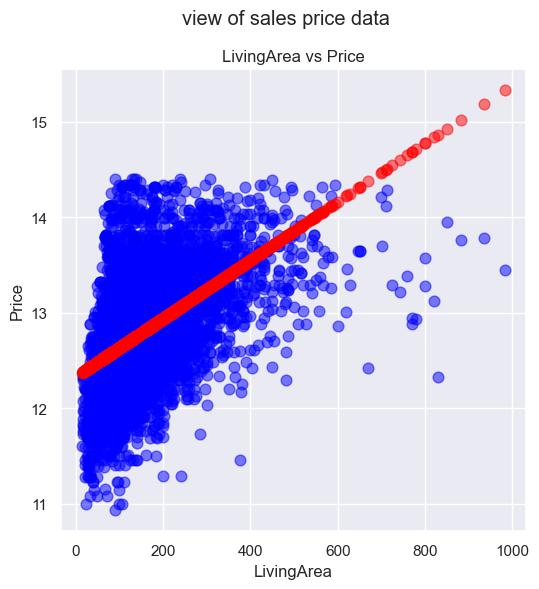

In [89]:
two_vs_three(X_test_slr[:, 0], y_test_slr, y_pred_slr, None, True)


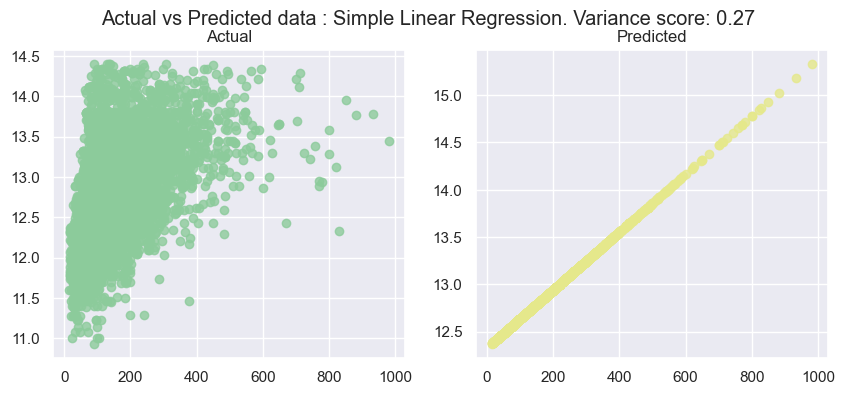

In [90]:
two_d_compare(X_test_slr, y_test_slr, y_pred_slr, model_name)


In [91]:
slrMetrics = model_metrics(slRegressor, y_test_slr, y_pred_slr)


Root mean squared error: 0.40
R2 score: 0.27


- Multiple Linear Regression Model

In [92]:
X_train, X_test, y_train, y_test = train_test_split(features, label, random_state=0)

print("Dimensions of datasets that will be used for training : Input features" + str(X_train.shape) +
      ". Output label" + str(y_train.shape))
print("Dimensions of datasets that will be used for testing : Input features" + str(X_test.shape) +
      ". Output label" + str(y_test.shape))

Dimensions of datasets that will be used for training : Input features(36431, 27). Output label(36431,)
Dimensions of datasets that will be used for testing : Input features(12144, 27). Output label(12144,)


In [93]:
from sklearn.linear_model import LinearRegression

model_name = 'Multiple Linear Regression'

mlRegressor = LinearRegression()

mlr_model = Pipeline(steps=[('preprocessorAll', preprocessorForAllColumns), ('regressor', mlRegressor)])

mlr_model.fit(X_train, y_train)

y_pred_mlr = mlr_model.predict(X_test)

print(mlRegressor)

LinearRegression()


In [94]:
print('Intercept: \n', mlRegressor.intercept_)
print('Coefficients: \n', mlRegressor.coef_)

Intercept: 
 12.34146557472166
Coefficients: 
 [ 0.40936708 -0.35834319  0.25745641 ...  0.02199102  0.01626726
 -0.0540211 ]


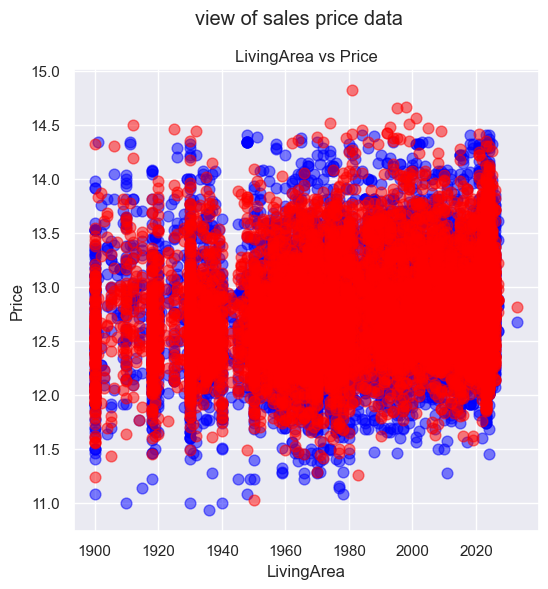

In [95]:
two_vs_three(X_test['ConstructionYear'], y_test, y_pred_mlr, X_test['LivingArea'], True)

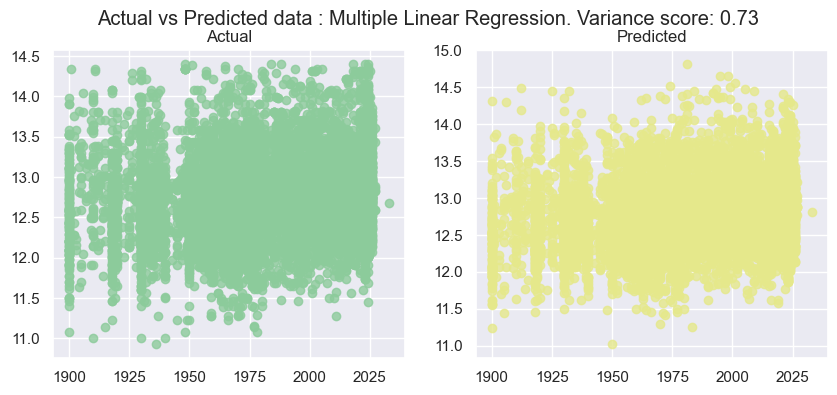

In [96]:
two_d_compare(X_test['ConstructionYear'], y_test, y_pred_mlr, model_name)

In [97]:
mlrMetrics = model_metrics(slRegressor, y_test, y_pred_mlr)

Root mean squared error: 0.24
R2 score: 0.73


- Decision Tree

In [98]:
X_train, X_test, y_train, y_test = train_test_split(features, np.log(df_pd['Price']), random_state=0)

print("Dimensions of datasets that will be used for training : Input features" + str(X_train.shape) +
      ". Output label" + str(y_train.shape))
print("Dimensions of datasets that will be used for testing : Input features" + str(X_test.shape) +
      ". Output label" + str(y_test.shape))

Dimensions of datasets that will be used for training : Input features(36431, 27). Output label(36431,)
Dimensions of datasets that will be used for testing : Input features(12144, 27). Output label(12144,)


In [99]:
from sklearn.tree import DecisionTreeRegressor

model_name = "Decision Tree Regressor"

decisionTreeRegressor = DecisionTreeRegressor(random_state=0, max_features=30)

dtr_model = Pipeline(steps=[('preprocessorAll', preprocessorForAllColumns), ('regressor', decisionTreeRegressor)])

dtr_model.fit(X_train, y_train)

y_pred_dtr = dtr_model.predict(X_test)

print(decisionTreeRegressor)

DecisionTreeRegressor(max_features=30, random_state=0)


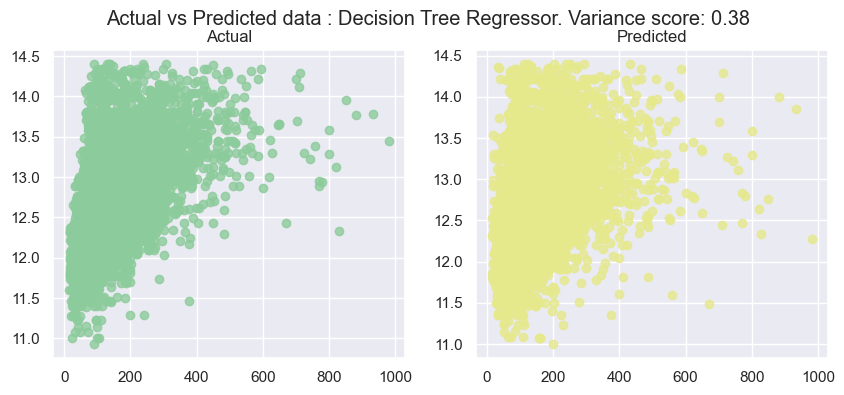

In [100]:
two_d_compare(X_test['LivingArea'], y_test, y_pred_dtr, model_name)

In [101]:
dtrMetrics = model_metrics(decisionTreeRegressor, y_test, y_pred_dtr)


Root mean squared error: 0.37
R2 score: 0.38


- Random forest regressor

In [102]:
from sklearn.ensemble import RandomForestRegressor

model_name = "Random Forest Regressor"

randomForestRegressor = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=0)

rfr_model = Pipeline(steps=[('preprocessorAll', preprocessorForAllColumns), ('regressor', randomForestRegressor)])

rfr_model.fit(X_train, y_train)

y_pred_rfr = rfr_model.predict(X_test)

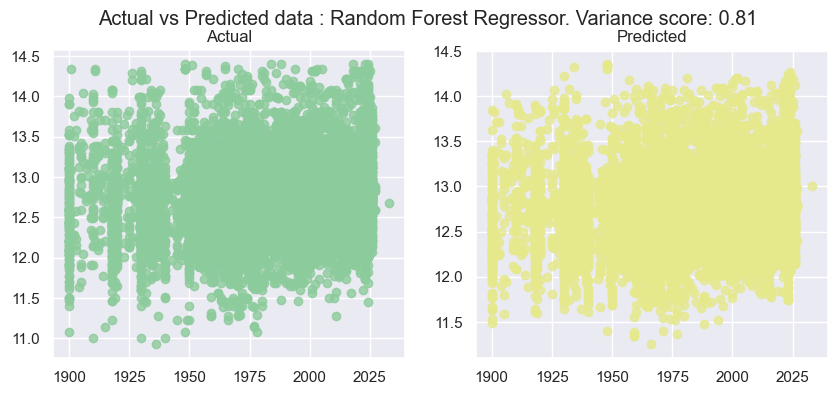

In [103]:
two_d_compare(X_test['ConstructionYear'], y_test, y_pred_rfr, model_name)


In [104]:
rfrMetrics = model_metrics(randomForestRegressor, y_test, y_pred_rfr)


Root mean squared error: 0.21
R2 score: 0.81


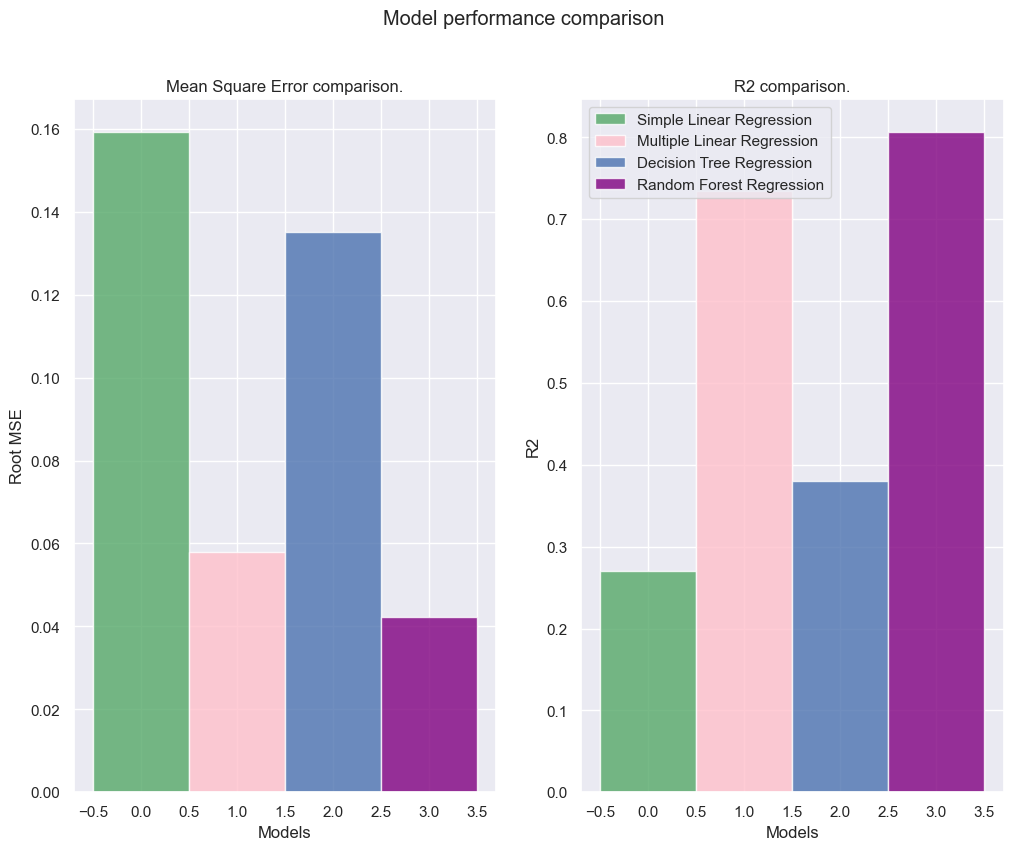

In [105]:
n_groups = 1
index = np.arange(n_groups)
bar_width = 1
opacity = 0.8

area = 60
plt.subplots(ncols=2, figsize=(12, 9))
plt.suptitle('Model performance comparison')

plt.subplot(121)
index = np.arange(n_groups)
bar_width = 1
opacity = 0.8

rects1 = plt.bar(index, slrMetrics[0], bar_width,
                 alpha=opacity,
                 color='g',
                 label='Simple Linear Regression')

rects2 = plt.bar(index + bar_width, mlrMetrics[0], bar_width,
                 alpha=opacity,
                 color='pink',
                 label='Multiple Linear Regression')

rects4 = plt.bar(index + bar_width * 2, dtrMetrics[0], bar_width,
                 alpha=opacity,
                 color='b',
                 label='Decision Tree Regression')

rects6 = plt.bar(index + bar_width * 3, rfrMetrics[0], bar_width,
                 alpha=opacity,
                 color='purple',
                 label='Random Forest Regression')

plt.xlabel('Models')
plt.ylabel('Root MSE')
plt.title('Mean Square Error comparison.')

plt.subplot(122)

rects1 = plt.bar(index, slrMetrics[1], bar_width,
                 alpha=opacity,
                 color='g',
                 label='Simple Linear Regression')

rects2 = plt.bar(index + bar_width, mlrMetrics[1], bar_width,
                 alpha=opacity,
                 color='pink',
                 label='Multiple Linear Regression')

rects4 = plt.bar(index + bar_width * 2, dtrMetrics[1], bar_width,
                 alpha=opacity,
                 color='b',
                 label='Decision Tree Regression')

rects6 = plt.bar(index + bar_width * 3, rfrMetrics[1], bar_width,
                 alpha=opacity,
                 color='purple',
                 label='Random Forest Regression')

plt.xlabel('Models')
plt.ylabel('R2')
plt.title('R2 comparison.')
ax.set_xticklabels(('', 'Simple Lin', 'Multiple Lin', 'Decision Tree', 'Random Forest'))

plt.legend()
plt.show()

In [112]:
# Сохранение модели
with open('model.pkl', 'wb') as file:
    pickle.dump(rfr_model, file)

# Загрузка модели
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Оценка модели на тестовых данных
score = loaded_model.score(X_test, y_test)

print(f"Model Score: {score}")

Model Score: 0.8061538808314199
